In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import talib
import statsmodels.api as sm 
import time 
import yfinance as yf
import os
#I have imported and used functions from the previous files uploaded in this repository. Many functions are required 
#for many further implementations and further calculations. 
import import_ipynb
import rolling_stats as rs
pd.options.display.float_format = '{:.5f}'.format

In [33]:
def get_data_close(symbol):
    stock = yf.Ticker(symbol)
    df = stock.history(period="max")
    return pd.DataFrame(df['Close'])

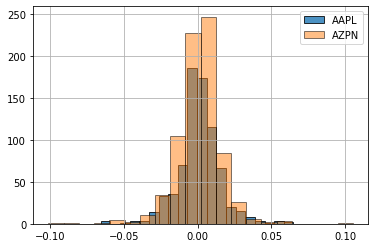

In [34]:
def plot_hist_with_stats(stocks, dates, m = False, bins = 20):
    '''
    This function is useful for plotting histograms for one or more than one stock at a time. 
    This function takes in a list of stock symbols , the range of dates, whether to plot the mean of the stock or not. Default value is False.
    This function also takes in the number of bins required in the histogram, the default value is 20. 
    '''
    df_daily_all = pd.DataFrame(index = dates)
    alpha = 0.8
    for s in stocks:
        #Using the daily_return function from the rolling_stats.py file. 
        df_return = rs.daily_return(s, dates, False)
        df_return = df_return.rename(columns={'Daily Return' : s})
        df_daily_all = df_daily_all.join(df_return) 
        ax = df_daily_all[s].hist(bins=bins,  edgecolor='black', alpha = alpha, label=s)
        alpha-=0.3
        if m==False:
            continue
        else:
            mean = df_return[s].mean()
            plt.axvline(mean, color = 'black')
    plt.legend()
    plt.show()
'''
Sample Run

dates = pd.date_range('2015-01-01','2017-12-31')
plot_hist_with_stats(['AAPL', 'AZPN'], dates)
'''

Correlation of  MSFT  and  AZPN  is: 
0.346826075210316


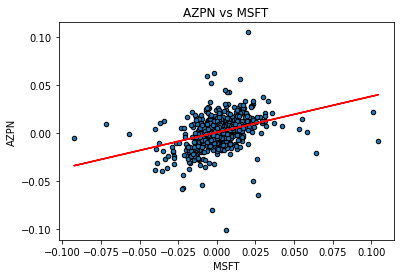

Correlation of  AAPL  and  GOOGL  is: 
0.4257518840170452


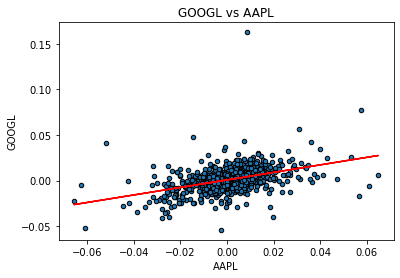

In [35]:
def plot_scatter(stocks, dates):
    for s in stocks:
        df_return1 = rs.daily_return(s[0], dates, False)
        df_return1 = df_return1.rename(columns= {"Daily Return": s[0]})
        df_return2 = rs.daily_return(s[1], dates, False)
        df_return2 = df_return2.rename(columns= {"Daily Return": s[1]})
        df_return = df_return1.join(df_return2)

        title = s[1] + ' vs ' + s[0]
        beta , alpha = np.polyfit(df_return[s[0]] , df_return[s[1]] , 1)
        df_return.plot(kind = 'scatter', x = s[0], y = s[1], edgecolor = 'black', title  = title)
        plt.plot(df_return[s[0]] , beta*df_return[s[0]] + alpha , color='red')
        print("Correlation of " , s[0], ' and ',  s[1], ' is: ')
        print(np.array(df_return.corr(method='pearson'))[0,1])
        plt.show()

'''
Sample run

plot_scatter([['MSFT', "AZPN"], ['AAPL', 'GOOGL']], dates)

'''